# DAT300 - Compulsory assignment 1

# Introduction

This notebook provides the solution for compulsory assignment 1 for Dat 300 (Deep learning) course. We were provided with a dataset from the titanic disaster. The dataset was based on 11 columns. Out of the 11 columns there is one target column as well that tells whether the person survived the accident of not. Our task was to train a model that predicted the target variable showing whether a person survived the event or not. 

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Data pre-processing and visualisation

In [2]:
# Load dataset from the train file 
data = pd.read_csv("train.csv")

In [3]:
# Observe the dataframe
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,target
0,0,8.978818,7933.245770,18.006690,-0.001341,2.194868,9.130840,10.482944,0.074981,2.703268e+04,0.0
1,1,3.994005,54.271828,36.536885,-0.000330,1.384795,23.773308,6.993599,-0.010534,7.544705e+05,0.0
2,2,0.997600,2.711767,32.193959,1.002930,-0.002403,33.363202,7.006054,0.082351,1.153677e+06,0.0
3,3,8.985727,7988.253415,21.677670,-0.002819,2.195637,10.488081,10.481805,-0.230482,5.169128e+04,0.0
4,4,9.000558,8107.606049,65.403913,0.001092,2.197287,12.416446,10.504148,0.087988,6.594806e+05,0.0


In [4]:
# Drop the unnamed column which is basically a serial number
data = data.drop(data.columns[0], axis=1)

In [5]:
# Check for null values
print(data.isna().sum())

col_0     0
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
target    0
dtype: int64


In [6]:
# Length of data
len(data)

160000

#### Visualization

In [7]:
data.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,target
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,1.600000e+05,1.600000e+05,160000.000000
mean,4.692211,2556.882075,38.842503,0.402870,1.235912,41.422999,8.485864,-1.722489e+01,1.271844e+07,0.428963
std,3.160399,3731.293204,18.239105,0.814047,0.862828,67.845301,3.249466,8.041504e+03,6.642855e+07,0.494929
min,0.968253,2.633340,-3.826358,-0.009382,-0.032262,1.867981,3.432973,-2.373622e+06,6.502112e-03,0.000000
25%,1.009518,2.744277,24.172138,-0.001803,0.009473,11.472291,6.988763,-1.749591e-01,1.010675e+05,0.000000
50%,3.998660,54.525056,39.534776,-0.000072,1.385959,23.492842,7.011010,1.291813e-02,4.643048e+05,0.000000
75%,8.980269,7944.772764,54.297277,0.994750,2.195030,31.776878,10.493763,2.489355e-01,2.488149e+06,1.000000
max,9.071419,8702.963926,84.941718,4.210325,2.205129,724.802989,24.949926,8.504923e+05,2.157407e+09,1.000000


If we observe this table we can see that columns (col_5, col_7 and col_8) are showing significant differences. We might have to remove the outliers for these

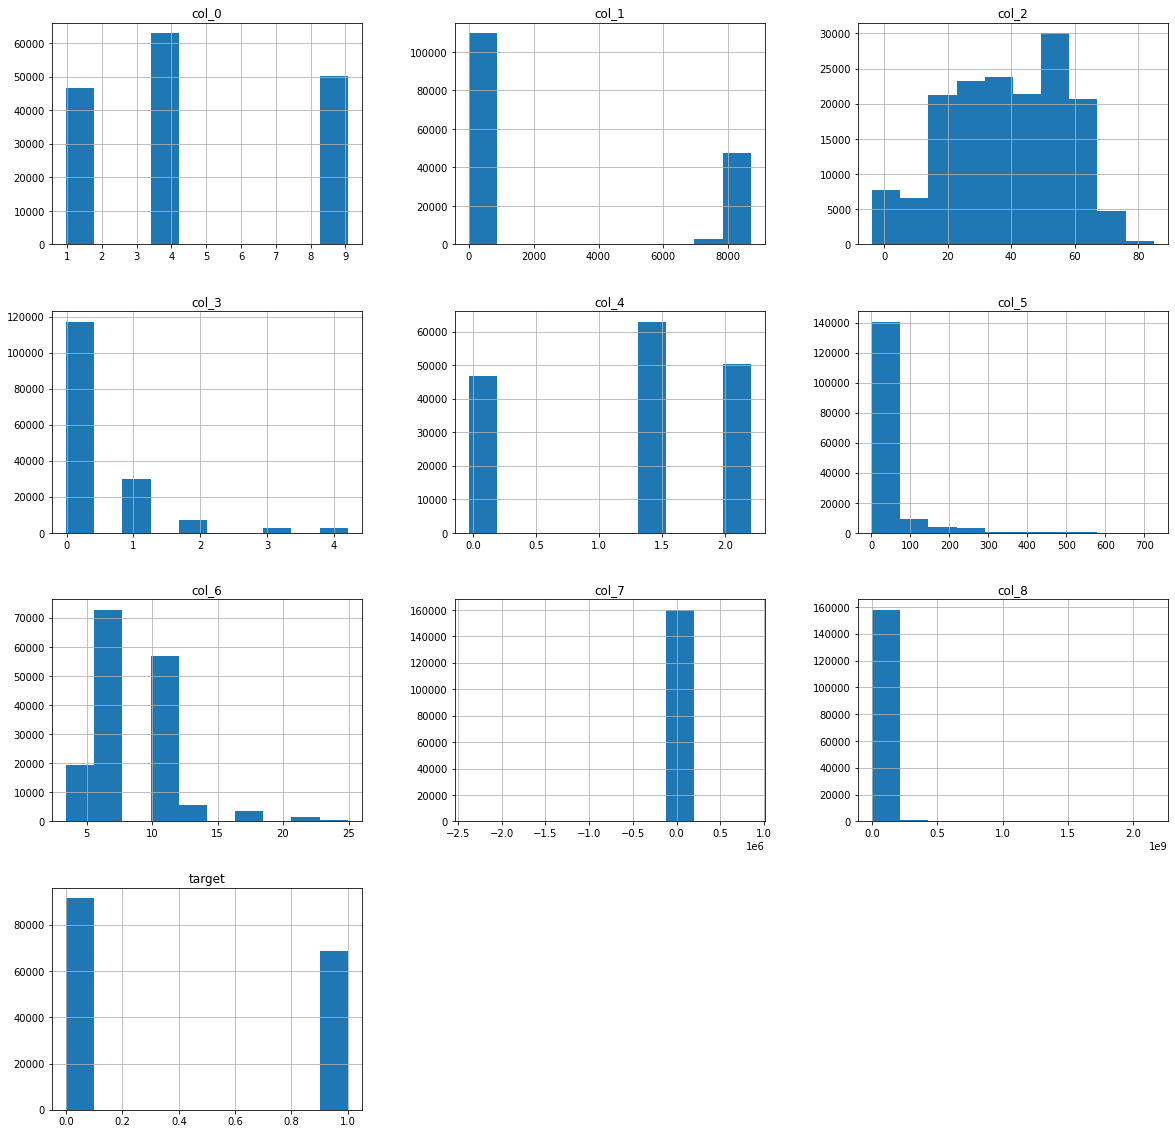

In [8]:
# Histograms
data.hist(figsize=(20,20))
plt.show()

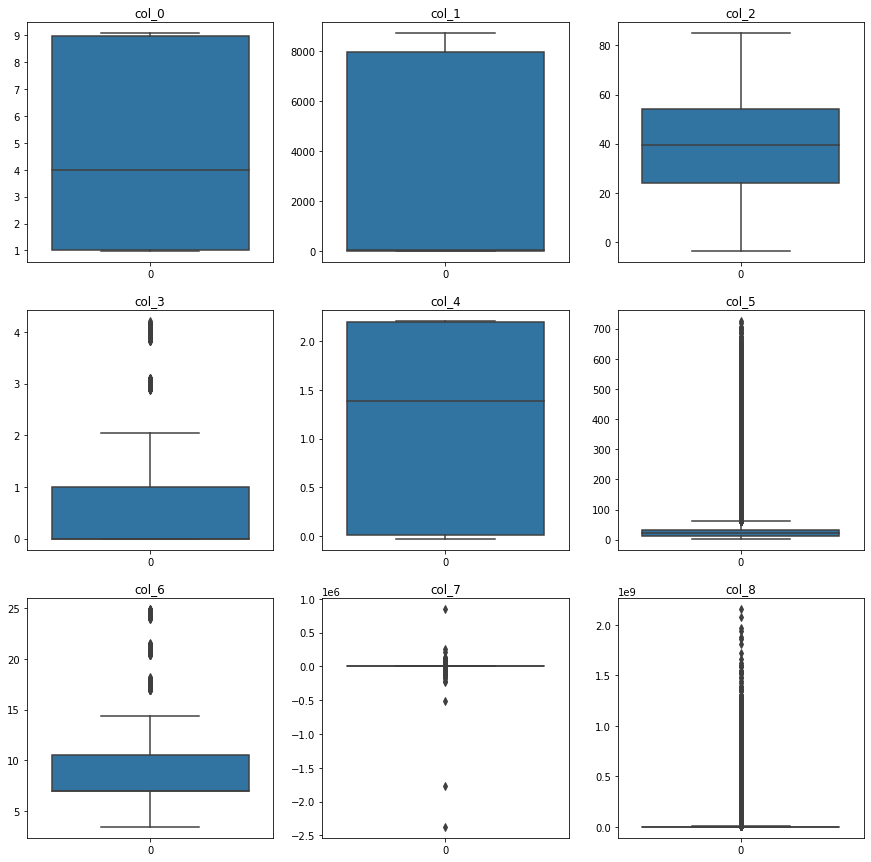

In [9]:
# Box Plots of the Columns
fig, axs = plt.subplots(3, 3,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[2])
    row += 1

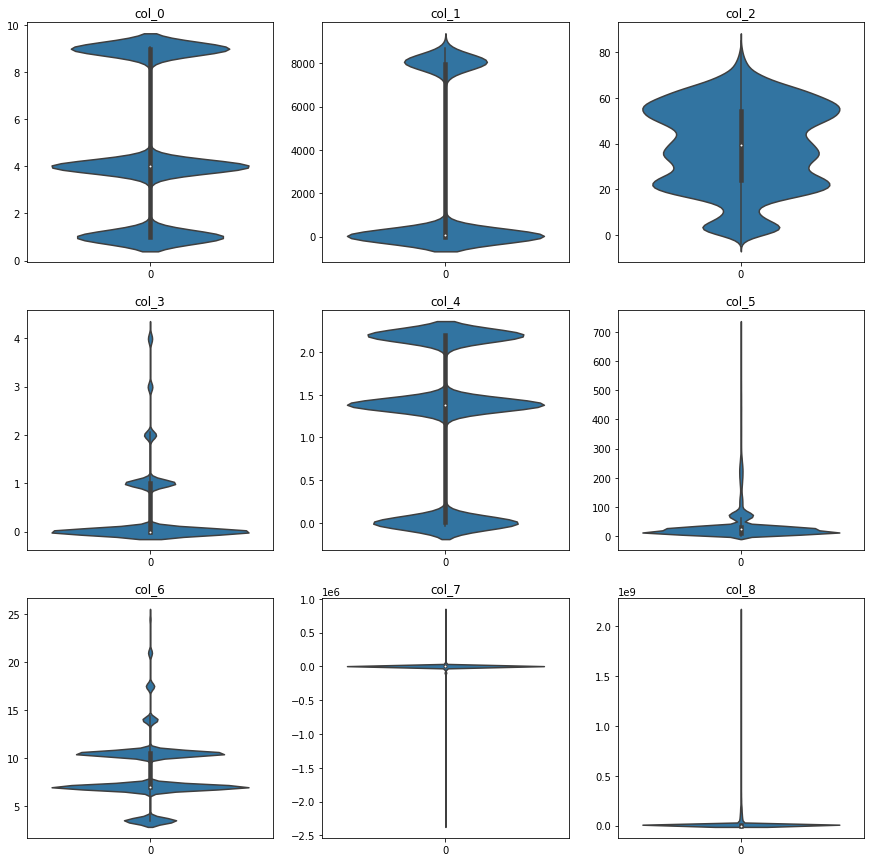

In [10]:
# Violen Plots of the Columns
fig, axs = plt.subplots(3, 3,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[2])
    row += 1

By observing the boxplots and violin plots, we confirm our theory of outliers in columns.

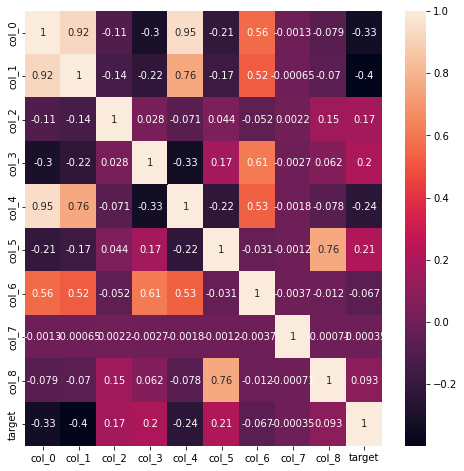

In [11]:
# Correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

By observing the correlation heat map we see that col_1 and col_0 are highly correlated. Furthermore, col_7 shows alomost no correlation with the target variable. So we will remove these columns. 

After removing the columns we will use the data to train machine learning models. We will not use the data with removed columns for training our ANN because the correlations could be non linear. We will let our ANN decide and train on its own.

In [8]:
data_ML = data.drop(columns=["col_0","col_7"])

In [9]:
data_ML.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_8,target
0,7933.245770,18.006690,-0.001341,2.194868,9.130840,10.482944,2.703268e+04,0.0
1,54.271828,36.536885,-0.000330,1.384795,23.773308,6.993599,7.544705e+05,0.0
2,2.711767,32.193959,1.002930,-0.002403,33.363202,7.006054,1.153677e+06,0.0
3,7988.253415,21.677670,-0.002819,2.195637,10.488081,10.481805,5.169128e+04,0.0
4,8107.606049,65.403913,0.001092,2.197287,12.416446,10.504148,6.594806e+05,0.0


<AxesSubplot:>

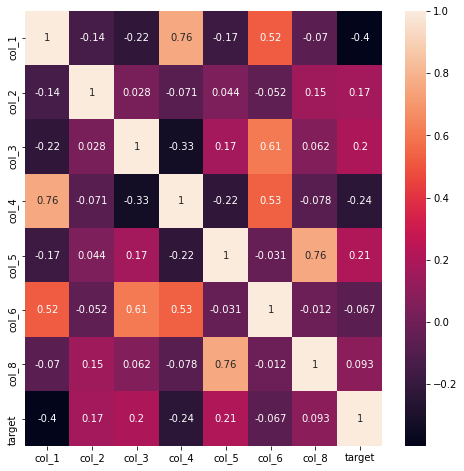

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data_ML.corr(),annot=True)

In [11]:
# Updating outliers and replacing them with median value
for x in data_ML.columns:
  if x == 'col_5' or x == 'col_7' or x == 'col_8':
    data_ML[x] = np.where(data_ML[x] > data_ML[x].quantile(0.90),
                                                 data_ML[x].quantile(0.50), data_ML[x])

In [16]:
# # Box Plots of the Columns after oulier removal
# fig, axs = plt.subplots(3, 3,figsize=(15,15))
# row = 0
# col = 0
# for x in axs:
#     row_position = 0
#     if row == 0:
#         col = 0
#     else:
#         col += 1
#     x[row_position].title.set_text(data_ML.columns[col])
#     sns.boxplot(data=data_ML[data_ML.columns[col]], ax=x[0])
#     col += 1
#     row_position += 1
#     x[row_position].title.set_text(data_ML.columns[col])
#     sns.boxplot(data=data_ML[data_ML.columns[col]], ax=x[1])
#     col += 1
#     row_position += 1
#     x[row_position].title.set_text(data_ML.columns[col])
#     sns.boxplot(data=data_ML[data_ML.columns[col]], ax=x[2])
#     row += 1

In [12]:
# Dividing dataset into X(train) and y(test)
X_ML = data_ML.iloc[:, 0:7]
y_ML = data_ML.iloc[:,7]

In [13]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X_ML, y_ML, test_size=0.2, random_state=3, stratify=y_ML)

In [14]:
# Standarization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Methods

The Classification algorithm had a significant running time, especially the support vector machine. A grid search was tried in this case, but was not used because of the long running time. Random forest proved to be a good classifier for this, as well as the SVM. With more optimization, the latter could have had a better performance. 

Setting outlier values to median value was done, to avoid exaggetrated "Down-scaling" of data of lower value when scaled. 
This seemed to have a positive impact to the accuracy. Not all outlier values were replaced with median, as more than the upper 10% quantile did not countain all outliers for the coluns.Therefore, the down-scaling could still be a factor. The downside to replacing outliers with median values is that important patterns can be removed, making it harder to perform a good prediction.

Column 7 were removed due to low correlation with the target. Column 0 were removed due to high correlation with column 1. 

As for ANN training, different activation functions than the sigmoid activation function was tested in the last layer, but we experienced a drop in the accuracy. This may indicate that there are non-linear trends in the dataset.

Grid search was performed for parameter optimization, with good results. 

For the ANN, lower amounts of epochs were tried, but with little success.

### Machine Learning models

In [16]:
# Suport Vector Classifier
svc = SVC(gamma='auto')
svc.fit(X_train_std, y_train)
print('Support Vector training accuracy: ' , svc.score(X_train_std, y_train))
svc.predict(X_test_std)
print('Support Vector validation accuracy: ' , svc.score(X_test_std, y_test))

Support Vector training accuracy:  0.7955078125
Support Vector validation accuracy:  0.79525


In [22]:
# Grid seacrh CV for Random Forrest
param_grid   = [{'n_estimators': [100,200,300], 'criterion': ["gini", "entropy"]}]
grid = GridSearchCV(estimator = RandomForestClassifier(random_state=1,n_jobs=-1), param_grid = param_grid)
grid.fit(X_train_std,y_train)
print('Random forrest with best params accuracy: ' , grid.best_score_)
print('Random forrest best params: ' ,grid.best_params_)
classifier_random = grid.best_estimator_
print('Random Forrest validation accuracy: ' , classifier_random.score(X_test_std, y_test))

Random forrest with best params accuracy:  0.7904609375
Random forrest best params:  {'criterion': 'entropy', 'n_estimators': 300}
Random Forrest validation accuracy:  0.79315625


### ANN Models

In [7]:
# Dividing dataset into X(train) and y(test)
X = data.iloc[:, 0:9]
y = data.iloc[:,9]
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)
# Standarization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model_simple = models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

In [19]:
model_simple.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
model_simple.fit(X_train_std,
                    y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(X_test_std, y_test))

Epoch 1/30
250/250 [==============================] - 1s 4ms/step - loss: 0.4348 - accuracy: 0.8007 - val_loss: 0.4340 - val_accuracy: 0.8001
Epoch 2/30
250/250 [==============================] - 1s 4ms/step - loss: 0.4345 - accuracy: 0.8005 - val_loss: 0.4360 - val_accuracy: 0.7999
Epoch 3/30
250/250 [==============================] - 1s 4ms/step - loss: 0.4349 - accuracy: 0.8005 - val_loss: 0.4340 - val_accuracy: 0.7997
Epoch 4/30
250/250 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.8013 - val_loss: 0.4330 - val_accuracy: 0.8010
Epoch 5/30
250/250 [==============================] - 1s 4ms/step - loss: 0.4338 - accuracy: 0.8010 - val_loss: 0.4323 - val_accuracy: 0.7996
Epoch 6/30
250/250 [==============================] - 1s 4ms/step - loss: 0.4337 - accuracy: 0.8016 - val_loss: 0.4308 - val_accuracy: 0.8009
Epoch 7/30
250/250 [==============================] - 1s 4ms/step - loss: 0.4331 - accuracy: 0.8012 - val_loss: 0.4327 - val_accuracy: 0.8016
Epoch 

Since the accuracy is pretty even from the lowest epoch values, and the loss is low, we had to perform a grid serch to see which was the optimal amount of epochs. 

In [27]:
model_simple

#### Grid Search for keras ANN

In [8]:
# Calculate number of nodes for each layer
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [9]:
# Create model
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer='rmsprop', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasClassifier(build_fn=createmodel, verbose = False) 

In [10]:
## Define params for grid search
activation_funcs = ['sigmoid', 'relu'] 
loss_funcs = ['binary_crossentropy']
param_grid = dict(n_layers=[2,3,4], first_layer_nodes = [128,64,32,16], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [128,256,512,1024], epochs = [10,20,30])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [11]:
# Train models
grid.fit(X_train_std,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f583d355e10>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation_func': ['sigmoid', 'relu'],
                         'batch_size': [128, 256, 512, 1024],
                         'epochs': [10, 20, 30],
                         'first_layer_nodes': [128, 64, 32, 16],
                         'last_layer_nodes': [4],
                         'loss_func': ['binary_crossentropy'],
                         'n_layers': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
print('Grid Search on ANN (Best Score): '  , grid.best_score_)
print('Grid Search on ANN (Best Params): ' ,grid.best_params_)

Grid Search on ANN (Best Score):  0.7983437657356263
Grid Search on ANN (Best Params):  {'activation_func': 'relu', 'batch_size': 256, 'epochs': 30, 'first_layer_nodes': 128, 'last_layer_nodes': 4, 'loss_func': 'binary_crossentropy', 'n_layers': 4}


In [13]:
best_ANN = grid.best_estimator_

In [14]:
def make_submisson(model, name = 'submission.csv'):
  data_test_final = pd.read_csv("test.csv")
  data_test_final = data_test_final.iloc[:, 1:10]
  print (data_test_final.head())
  data_test_std = sc.transform(data_test_final)
  test_pred_final = model.predict(data_test_std)
  print (test_pred_final)
  # Convert probabilities to classes
  targets = (test_pred_final > 0.5).astype("int64").astype("float64")
  csv_data = {'Survived':targets[:, 0]} 
  df = pd.DataFrame(csv_data) 
  df.index.name = 'Id'
  print(df.head())
  df.to_csv(name)

In [22]:
make_submisson(model_simple, 'submission_simple.csv')

      col_0        col_1      col_2  ...      col_6       col_7          col_8
0  4.022784    55.856406  29.922403  ...   7.014724   -0.083142  601273.608998
1  3.992970    54.215653  26.485782  ...   6.985344    0.288968  206517.816317
2  8.992121  8039.491762  59.917066  ...  10.496820   -0.039709  222066.359095
3  0.984910     2.677570   4.797783  ...   7.005128  470.613913   22911.001098
4  1.000011     2.718311  32.485426  ...   3.494827    0.859416   85149.762596

[5 rows x 9 columns]
[[0.7827109 ]
 [0.08352521]
 [0.09349078]
 ...
 [0.27765667]
 [0.43107867]
 [0.01479951]]
    Survived
Id          
0        1.0
1        0.0
2        0.0
3        1.0
4        0.0


In [17]:
make_submisson(best_ANN, 'submission_grid.csv')

      col_0        col_1      col_2  ...      col_6       col_7          col_8
0  4.022784    55.856406  29.922403  ...   7.014724   -0.083142  601273.608998
1  3.992970    54.215653  26.485782  ...   6.985344    0.288968  206517.816317
2  8.992121  8039.491762  59.917066  ...  10.496820   -0.039709  222066.359095
3  0.984910     2.677570   4.797783  ...   7.005128  470.613913   22911.001098
4  1.000011     2.718311  32.485426  ...   3.494827    0.859416   85149.762596

[5 rows x 9 columns]
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
    Survived
Id          
0        1.0
1        0.0
2        0.0
3        1.0
4        0.0


# Results

# Discussion / conclusion

Provide a summary of the assignment: (you are required to address **the first three** points of the list below)
- obstacles / problems you have met regarding the modelling proces
- degree of success
- given more time, what would be done differently
- further comments (if any)

- Challenges in the modelling was the large variance in the data; large amounts of data were grouped in "high value" outlier groups. 
These were too many to be removed, so the effect of this could be that the scaled data would leave the majority of values very small, making it harder for the algorithm to detect trends in the lower velued data, and apply the right weights here. A challenge with ANN is the vast amount of options to go with - leaving the likelyhood to achieve the optimal solution smaller.

- The model achieved an accuracy of around 80%, which is quite good with a difficult data set. The ANN model did however not perform very much better than the simpler models, which is lower than one would expect with a more advanced model. 

- A variety of options could be tested; amount layers, different layer sizes and various preprocessing options like feature engineering etc. We encountered large differences by making small alterations to the i.e. batch size and epochs of the model, 